# Joint-pointwise comparison


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
hard = pd.read_csv('../results/1-hard-pointwise-joint.csv')
easy = pd.read_csv('../results/1-easy-pointwise-joint.csv')
alphas = sorted(hard.alpha.unique())

In [29]:
hard.scheme.unique()

array(['hv-block (h=3, v=3)', '5-fold', '10-fold', 'LFO (h=3, v=3, m=10)'],
      dtype=object)

In [30]:
easy.head()

,scheme,alpha,sigsq_star,sigsq_mA,sigsq_mB,phi_mA,phi_mB,j_lower_q,j_upper_q,j_negshare,pw_lower_q,pw_upper_q,pw_negshare
0,"hv-block (h=3, v=3)",0.00,1.0,1.867006,4.882421,[0.07127452],[0.152513],34.766033,59.761187,0.0,35.081685,60.476853,0.0
1,5-fold,0.00,1.0,1.867006,4.882421,[0.07127452],[0.152513],33.939011,58.800491,0.0,33.662145,59.804954,0.0
2,10-fold,0.00,1.0,1.867006,4.882421,[0.07127452],[0.152513],34.115250,58.772364,0.0,34.986595,60.178112,0.0
3,"LFO (h=3, v=3, m=10)",0.00,1.0,1.867006,4.882421,[0.07127452],[0.152513],34.823291,61.074407,0.0,35.186540,61.550115,0.0
4,"hv-block (h=3, v=3)",0.25,1.0,1.864215,4.876541,[0.26744523],[0.33470725],34.904774,59.947610,0.0,34.291154,62.290365,0.0


In [31]:
schemes = ['hv-block (h=3, v=3)', '5-fold', '10-fold', 'LFO (h=3, v=3, m=10)']

In [32]:
table = []
def tabulate(df, modelname):
    # easy variant
    for s in schemes:
        rec = {
            'model': modelname,
            'scheme': s,
        }
        for a in alphas:
            err = df[(df.alpha == a) & (df.scheme == s)].j_negshare
            rec[f'joint {a}'] = 100*round(float(err),3) if err is not None else None
        for a in alphas:
            err = df[(df.alpha == a) & (df.scheme == s)].pw_negshare
            rec[f'pw {a}'] = 100*round(float(err),3) if err is not None else None
        table.append(rec)

tabulate(easy, 'easy')
tabulate(hard, 'hard')
tabledf = pd.DataFrame(table)
tabledf

,model,scheme,joint 0.0,joint 0.25,joint 0.5,joint 0.75,joint 1.0,pw 0.0,pw 0.25,pw 0.5,pw 0.75,pw 1.0
0,easy,"hv-block (h=3, v=3)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.2
1,easy,5-fold,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,5.5
2,easy,10-fold,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.3
3,easy,"LFO (h=3, v=3, m=10)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9
4,hard,"hv-block (h=3, v=3)",5.9,5.8,6.0,7.3,14.8,4.7,4.2,6.5,19.2,93.0
5,hard,5-fold,7.6,7.2,7.1,7.3,10.3,8.6,9.3,14.4,33.0,90.6
6,hard,10-fold,7.2,8.2,10.1,13.5,20.2,5.7,4.6,5.9,17.1,94.1
7,hard,"LFO (h=3, v=3, m=10)",19.3,19.5,20.5,22.8,33.7,16.4,13.3,14.4,29.8,98.3


In [33]:
tabledf.scheme.unique()

array(['hv-block (h=3, v=3)', '5-fold', '10-fold', 'LFO (h=3, v=3, m=10)'],
      dtype=object)

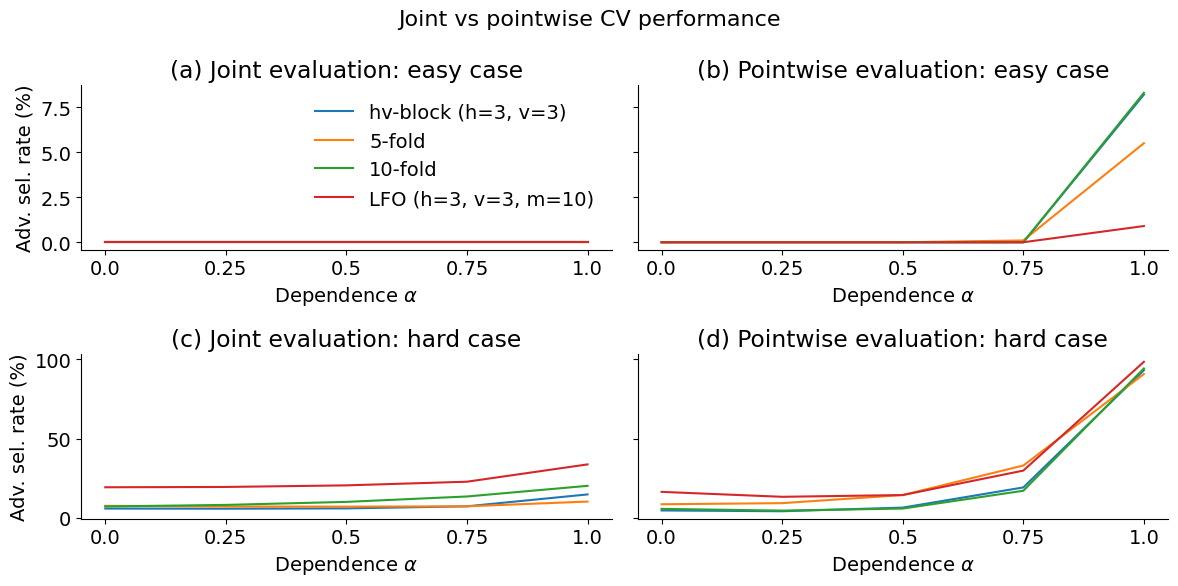

In [36]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,6), sharey='row', sharex=True)

plt.rc('font', size=14)

for i, (model, axrow) in enumerate(zip(['easy', 'hard'], axes)):
    for scheme in schemes:
        df = tabledf[(tabledf.model == model) & (tabledf.scheme == scheme)]
        df = df.drop(columns=['model', 'scheme'])
        axrow[0].plot(alphas, df.iloc[0][:5])
        axrow[1].plot(alphas, df.iloc[0][5:])
    axrow[0].set_title(f'({chr(ord("a")+0+2*i)}) Joint evaluation: {model} case')
    axrow[1].set_title(f'({chr(ord("a")+1+2*i)}) Pointwise evaluation: {model} case')
    axrow[0].set_ylabel('Adv. sel. rate (%)')

for ax in axes.ravel():
    ax.set_xticks(alphas)
    ax.set_xticklabels(alphas)
    ax.xaxis.tick_bottom()
    ax.xaxis.set_tick_params(labelbottom=True)
    ax.set_xlabel(r'Dependence $\alpha$')
    ax.spines[['top','right']].set_visible(False)

axes[0,0].legend(schemes, frameon=False)

fig.suptitle('Joint vs pointwise CV performance', fontsize=16)

fig.subplots_adjust(wspace=0)
fig.tight_layout()
fig.savefig('../../paper/figures/joint-pointwise-comparison.pdf', bbox_inches='tight')